# 1) Analysis of multi-qubit UQC

Previously, we used the 1-qubit Architecture from adrien that looks something like this

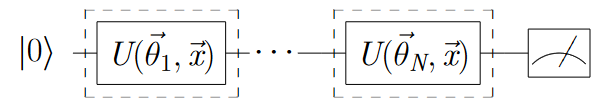

And we got the best performance so far of any model (as far as I know).

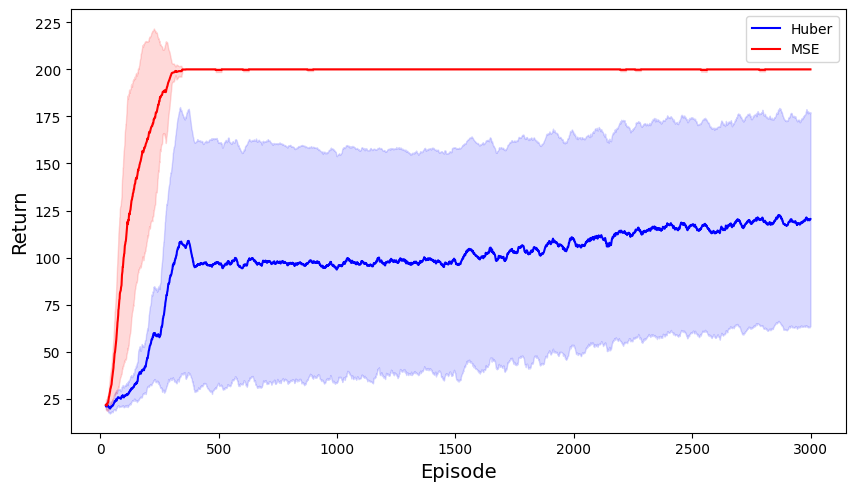

So, now we want to test the same model but with more qubits and different number of layers. We might be able to get the same level or an even better level of performance if we have more qubits and less layers.

However, before going into that, we distinguish between two different types of encoding:

- **Full Encoding** - Every single feature is encoded into every single qubit.
- **Partial Encoding** - The features are split into groups and each group is encoded into a different qubit.

## 1.1) Performance of the full encoding models

Let's start by fixing the number of qubits at 2 and varying the number of layers between 2 and 5.

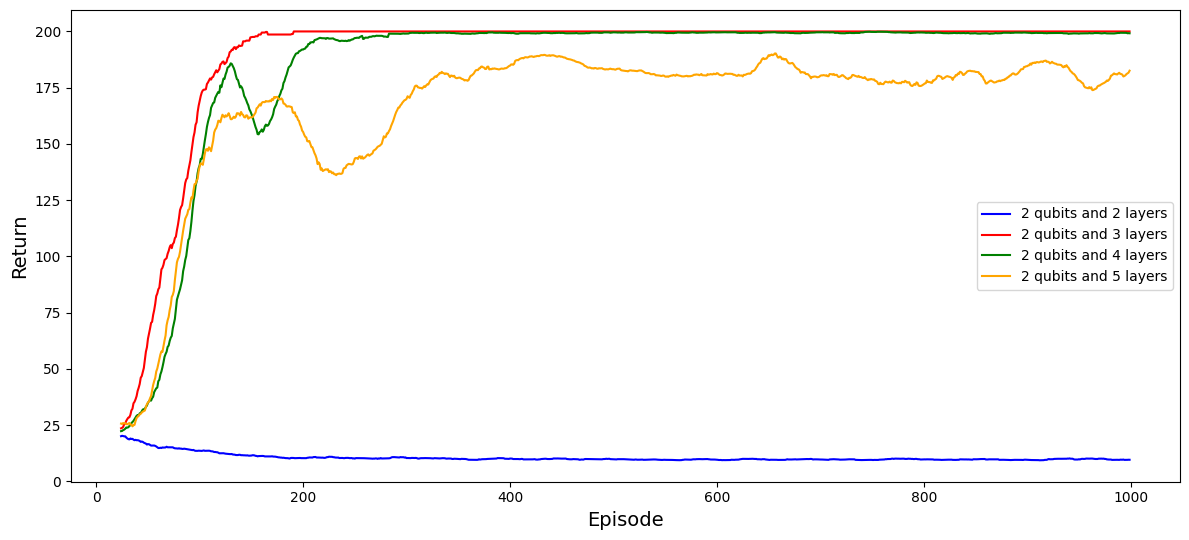

Conclusions:
- The model "saturates" very quickly. There is a huge increase in performance from 2 to 3 layers
- They have double the amount of parameters than the 1-qubit models, so they migh be much more expressive, and thus need less layers to perform well.
- That migh also explain the decrease in performance from 4 to 5 layers - expressivity-trainability tradeoff?

Let's do the same study for the 4-qubit models.

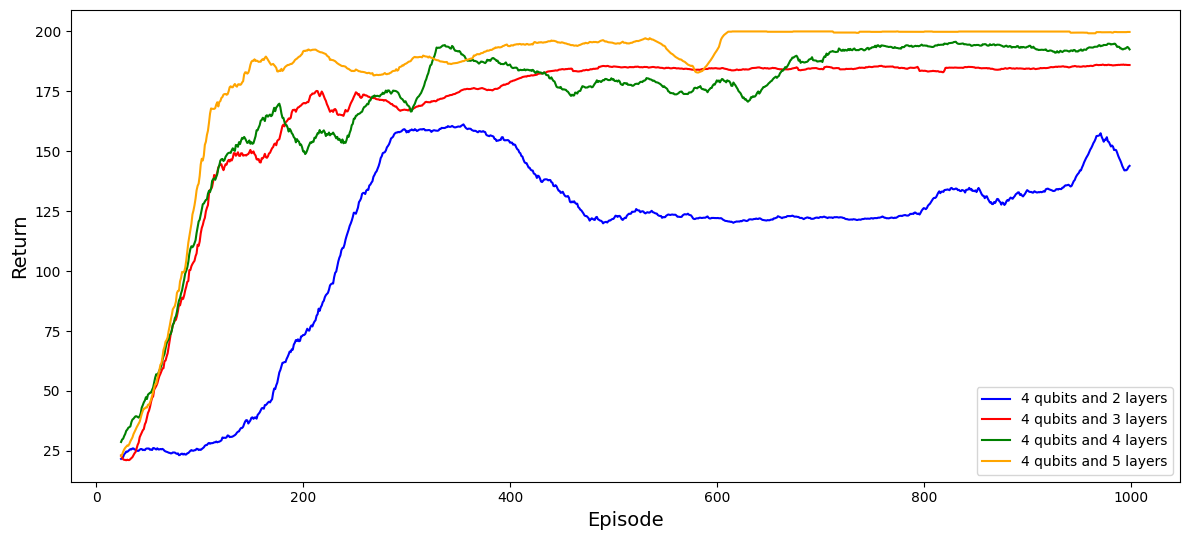

Conclusions:
- The performance for two layers is much better than the performance for 2 layers of the 2 qubit models.
- It makes sense since it has double the amount of parameters -> more expressive

Now let's compare the best model for each number of qubits:

- Single-qubit case: 5 layers
- Two-qubit case: 3 layers
- Four Qubit case: 5 layers

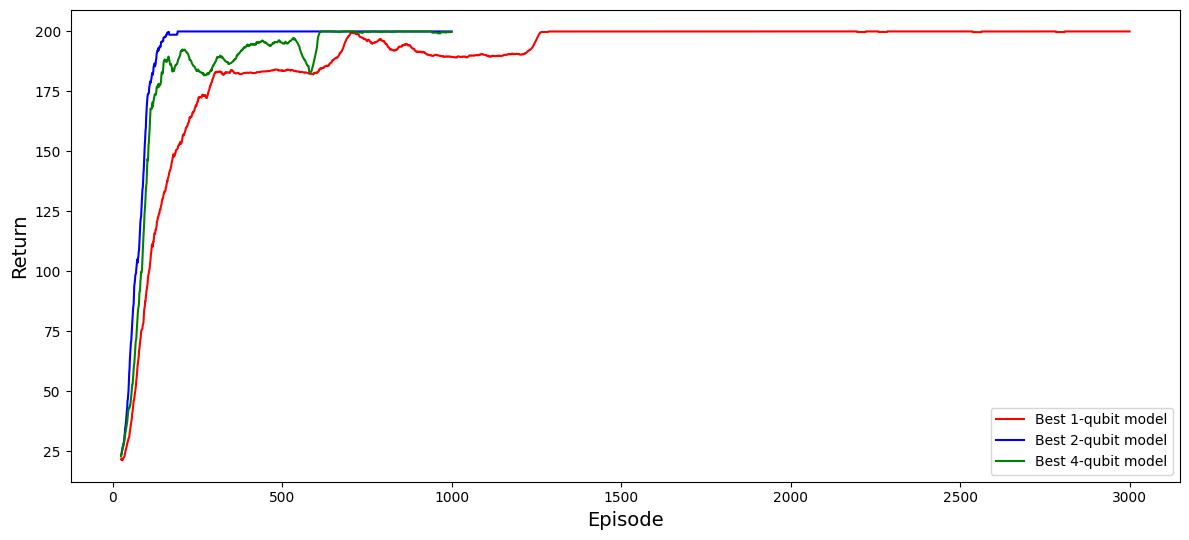

Conclusions:
- The best model is the 2-qubit model, which is interesting.
- Maybe this model sits in a "golden zone" in terms of the number of parameters?
- Maybe after a certain number of parameters, the model becomes too hard to train?

## 1.2) Performance of the partial encoding models

Fixing the number of qubits at 2 and varying the number of layers:

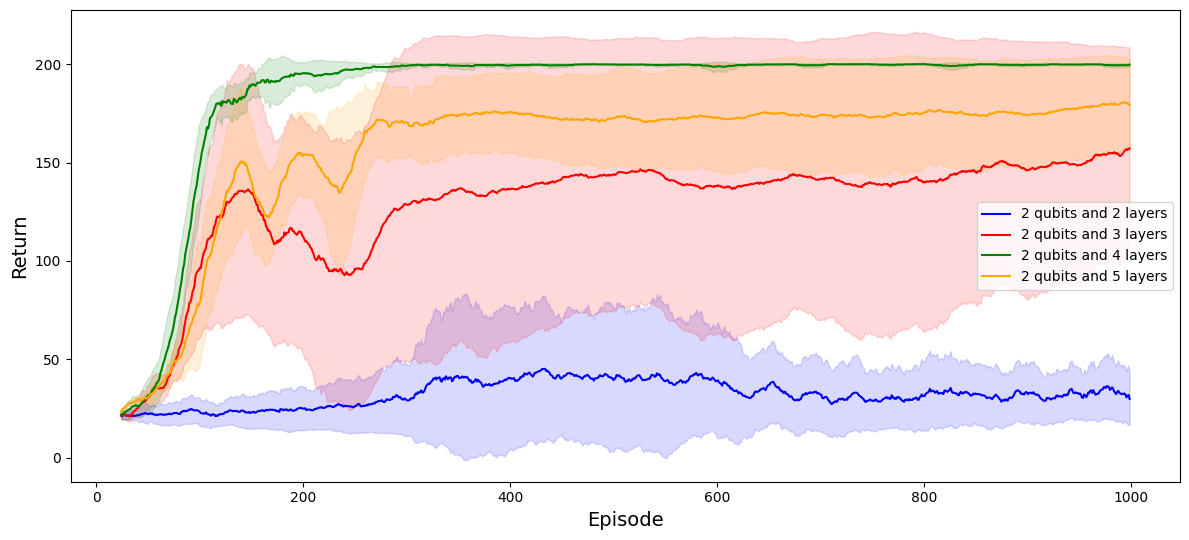

Conclusions:
- There isn't such a big jump from 2 layers to 3 layers as in the full encoding case.
- The best number of layers here is 4, which is one more layer than in the full encoding case.
- That might be because this model has less parameters?

Now let's do the same for the 4-qubit models:

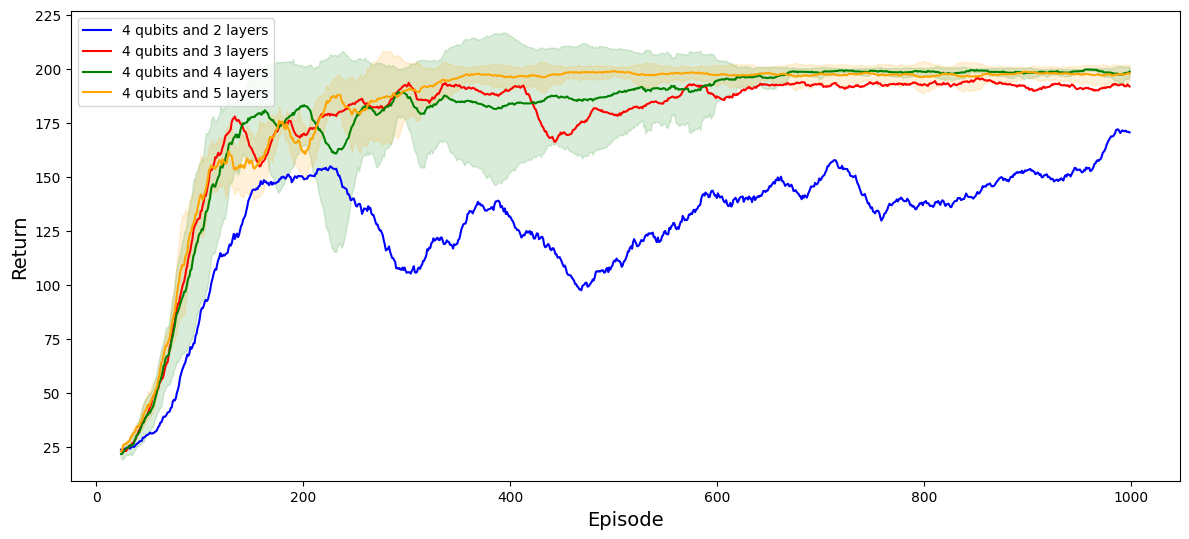

Conclusions:
- Now, even the model with 2 layers actually learns something, unlike what happened in the 2-qubit model (This also happened in the full encoding case).
- The models continuously get better as we increase the number of layers.

Let's compare the performance of each one of the best models for each number of qubits.

- Single-qubit case: 5 layers
- Two-qubit case: 4 layers
- Four Qubit case: 5 layers

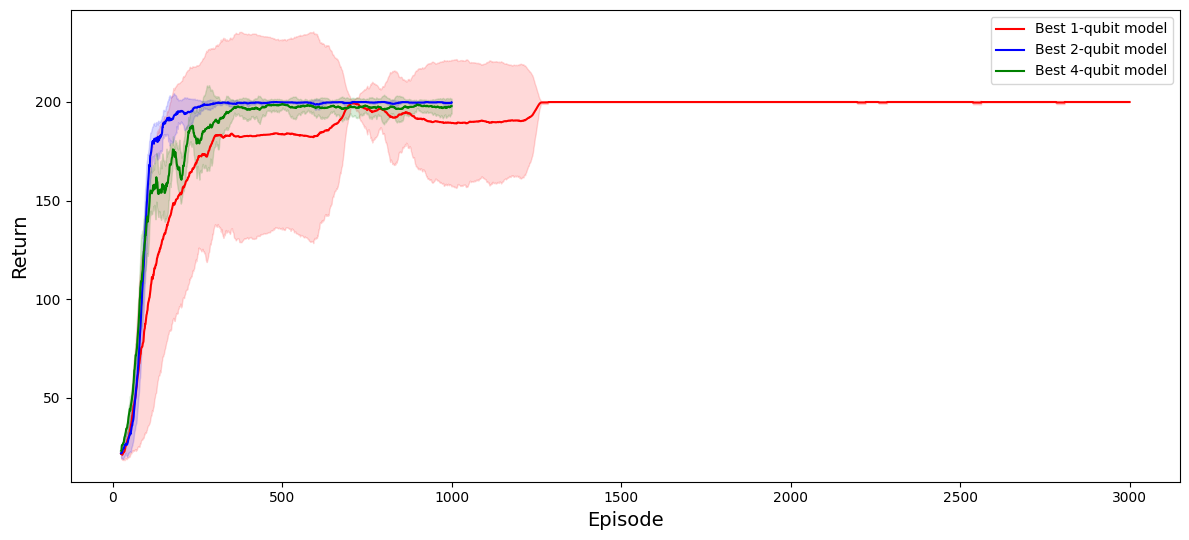

Conclusions:
- Once again, the 2-qubit model leads to the best performance

## 1.3) Performance of the full encoding models vs partial encoding models

Let's start by comparing the 2 qubit models for each number of layers

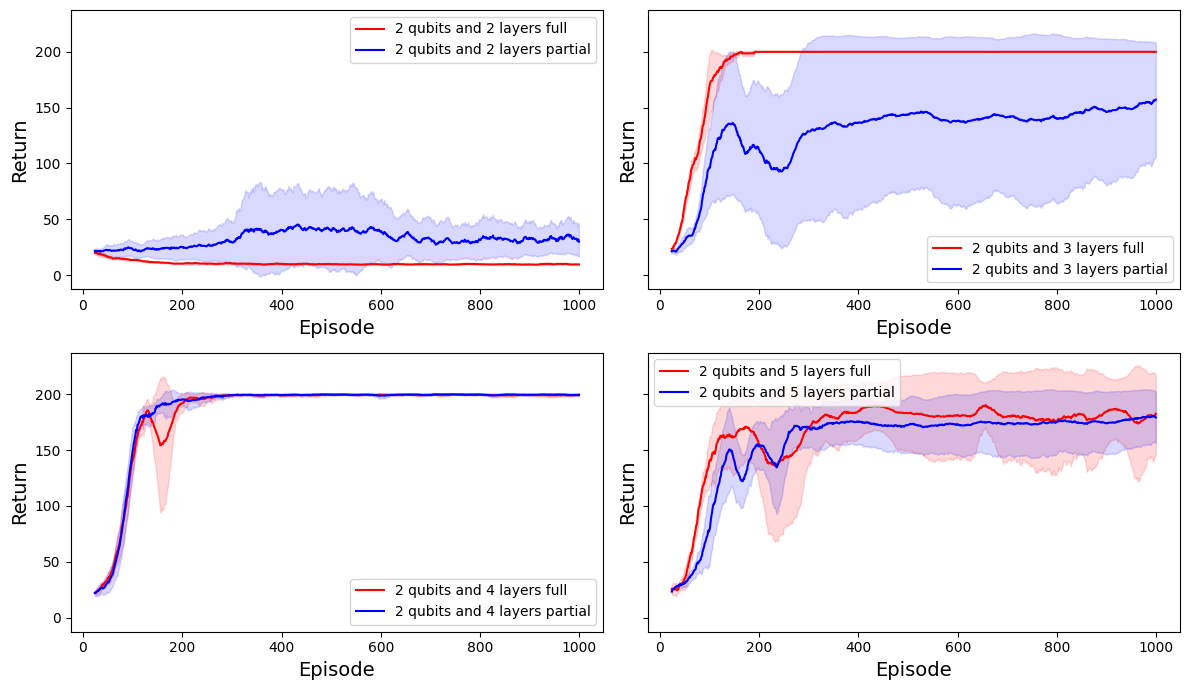

Conclusions:
- With 2 layers, the partial encoding method actually learns something, unlike the full encoding method.
- With 3 layers, the full encoding method is MUCH better, which is very interesting.
- With 4 and 5 layers, the performance is very similar and the differences can be attributed to randomness.

Now let's do the same for the 4-qubit models:

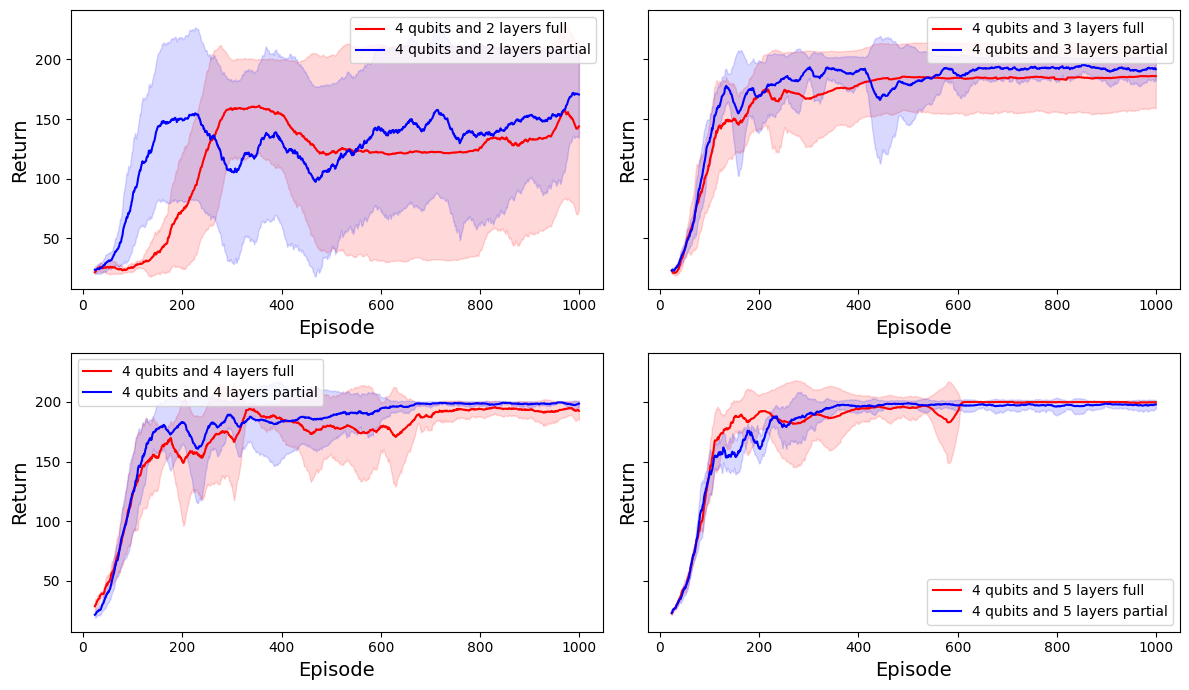

Conclusions:
- In the case of the 4 qubit models, the performance of both methods of encoding is very similar.
- Thus, we should always choose the partial encoding method since it has less parameters -> less training time and memory consumption advantage.

# 2) Optuna Hypersearch

- 1) Define Suggested Hyperparameters:
    - Number of layers (min = 1, max = 5, steps = 1)
    - Learning Rate (Categorical, [0.0001,0.001,0.1])
    - Batch Size (Categorical, [32,64,128])

- 2) Define the performance metric:
    - Area under the curve of the return averaged over the 5 agents normalized between 0 and 1

- 3) Create a new trial with suggested hyperparameters chosen by optuna

- 4) Evaluate the trial based on the performance metric

- 5) Repeat steps 3 and 4 until hyperparameters that maximize the performance metric are found